In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM
import pickle
import matplotlib
import pandas as pd

In [2]:
qrange = linspace(0, 5, 51)
erange = linspace(-5, 5, 201)

In [3]:
qrange_HI = linspace(0, 5, 101)
erange_HI = linspace(-5, 5, 401)

In [4]:
m = 0.5

In [5]:
pt = Particle(m, qrange, erange)
pt_HI = Particle(m, qrange_HI, erange_HI)

In [6]:
ch = Channel(pt, pt, 0.2, G=52)
ch_HI = Channel(pt_HI, pt_HI, 0.2, G=52)

In [7]:
ch.populate_T()
ch_HI.populate_T()

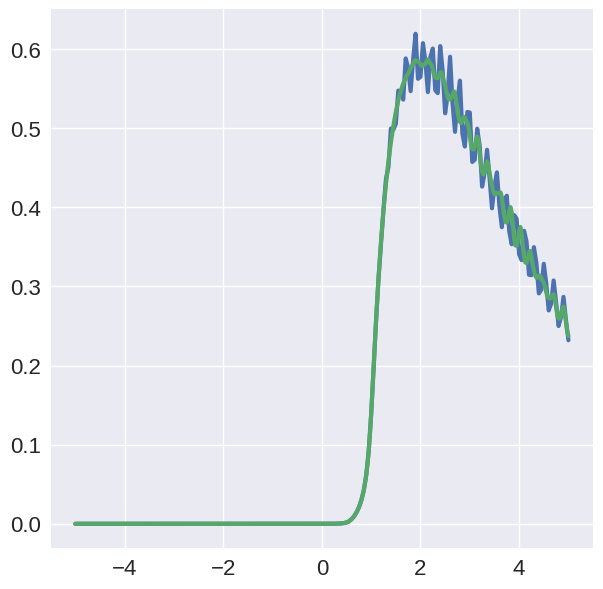

In [8]:
plt.plot(erange, imag(ch.XS[0][:, 0]))
plt.plot(erange_HI, imag(ch_HI.XS[0][:, 0]))

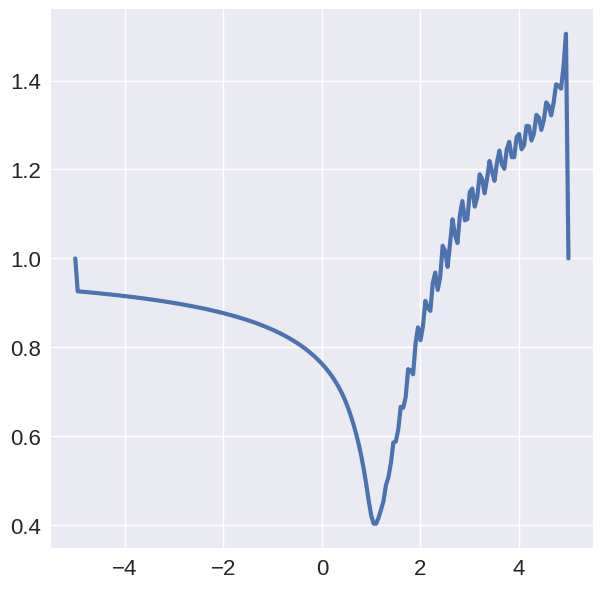

In [9]:
plt.plot(erange, real(1 - ch.XS[0][:, 0]))

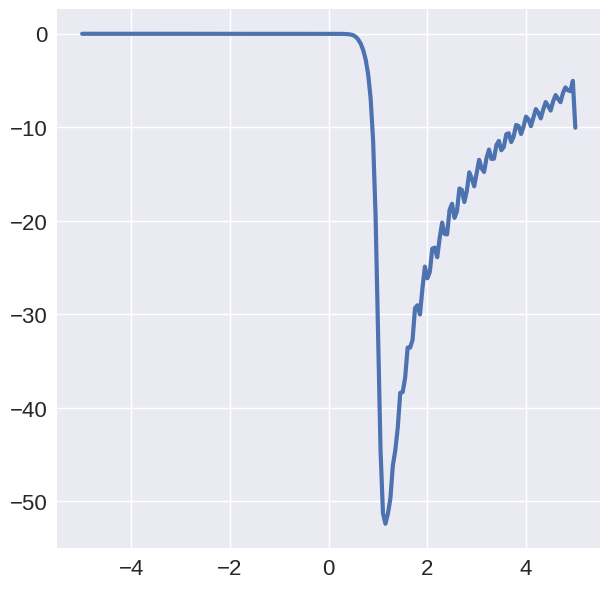

In [10]:
plt.plot(erange, imag(ch.TM[:, 0]))

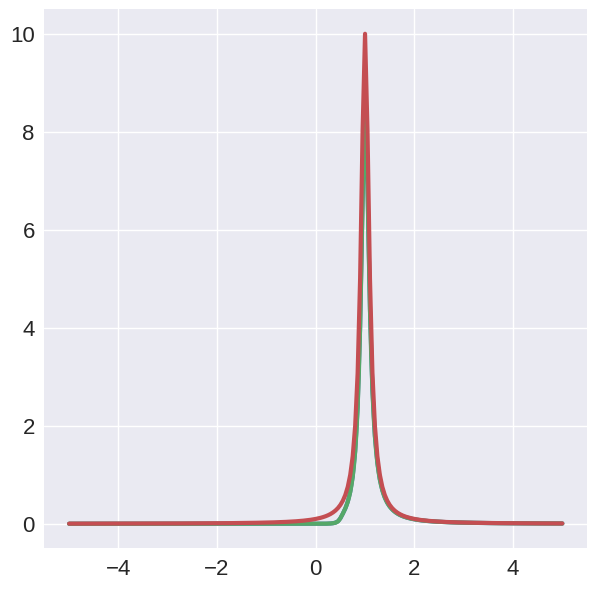

In [11]:
plt.plot(erange, -imag(ch.G2[:, 0]))
plt.plot(erange_HI, -imag(ch_HI.G2[:, 0]))
plt.plot(erange, -imag(ch.G20(erange, 0)))
# plt.semilogy()

Test with analytic $G_2$

In [12]:
G2 = array([ch.G20(erange, q) for q in qrange]).transpose()

In [13]:
iImG2 = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(G2)))
iReG2 = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(G2)))

In [15]:
xs = np.array([tm.x_solve(E, 0, 0, ch.T, ch.iVS[0], ch.iOm, iReG2, iImG2, 5, 1) for E in erange])


In [18]:
xs0 = np.array([tm.x_solve(E, 0, 0, ch.T, ch.iVS[0], ch.iOm, ch.iReG2, ch.iImG2, 5, 1) for E in erange])
xs0_adaptive = np.array([tm.x_solve(E, 0, 0, ch.T, ch.iVS[0], ch.iOm, ch.iReG2, ch.iImG2, 5, 1, adaptive=1) for E in erange])

In [19]:
ch.G2.shape

(201, 51)

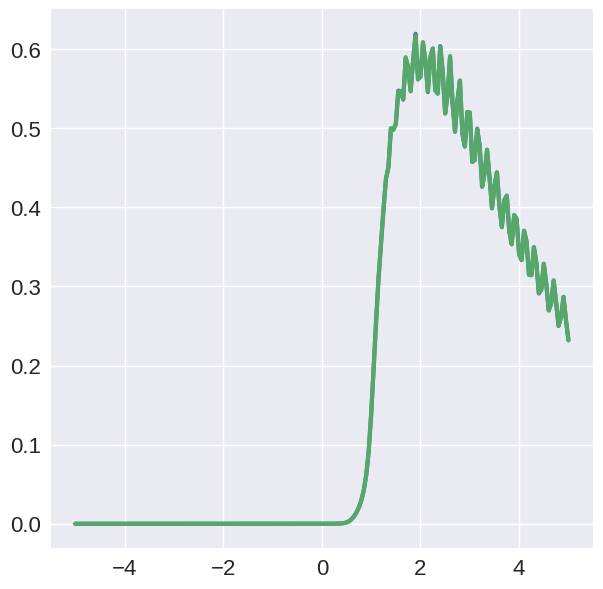

In [21]:
# plt.plot(erange, imag(xs))
plt.plot(erange, imag(xs0))
plt.plot(erange, imag(xs0_adaptive))

In [22]:
def integrand(k, E):
    return -2/pi*k**2 * ch.iVS[0](k)**2 * ch_HI.iImG2(k, E)

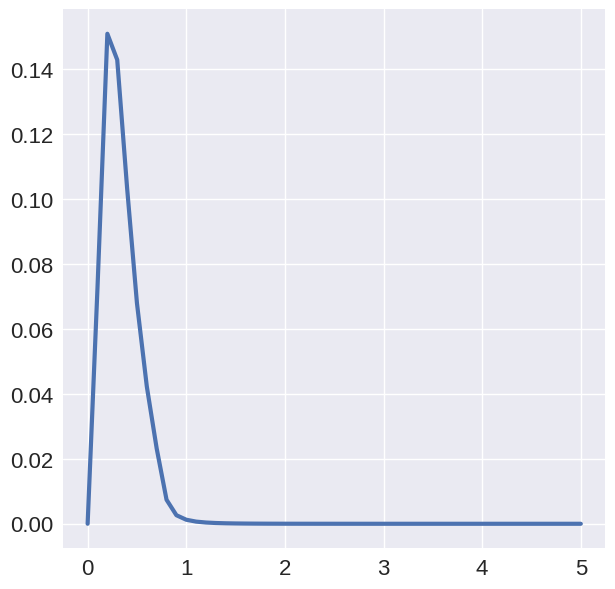

In [23]:
plt.plot(qrange, [integrand(q, 0.9) for q in qrange])

In [24]:
from scipy.integrate import quad

In [25]:
imX = array([quad(lambda z: integrand(z, E), 1e-3, 5)[0] for E in erange])

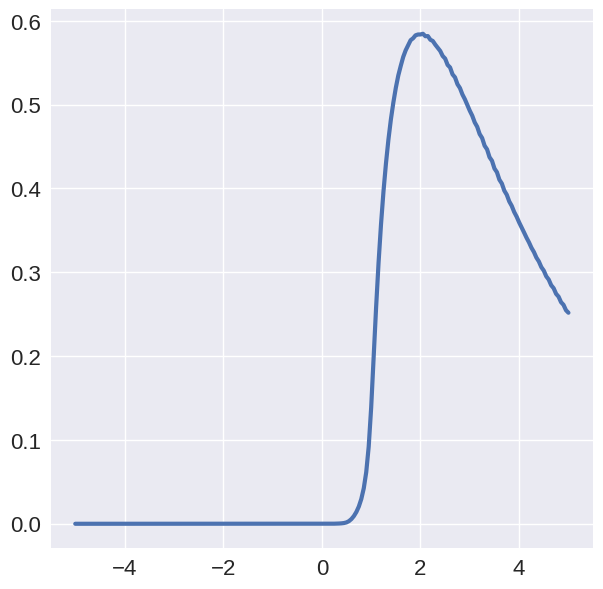

In [26]:
plt.plot(erange, imX)
# plt.plot(erange, imag(ch_HI.XS[0][::2, 0]))

In [27]:
xs0_hi = np.array([tm.x_solve(E, 0, 0, ch_HI.T, ch_HI.iVS[0], ch_HI.iOm, ch_HI.iReG2, ch_HI.iImG2, 5, 1) for E in erange])
xs0_hi_adaptive = np.array([tm.x_solve(E, 0, 0, ch_HI.T, ch_HI.iVS[0], ch_HI.iOm, ch_HI.iReG2, ch_HI.iImG2, 5, 1, adaptive=1) for E in erange])

/usr/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


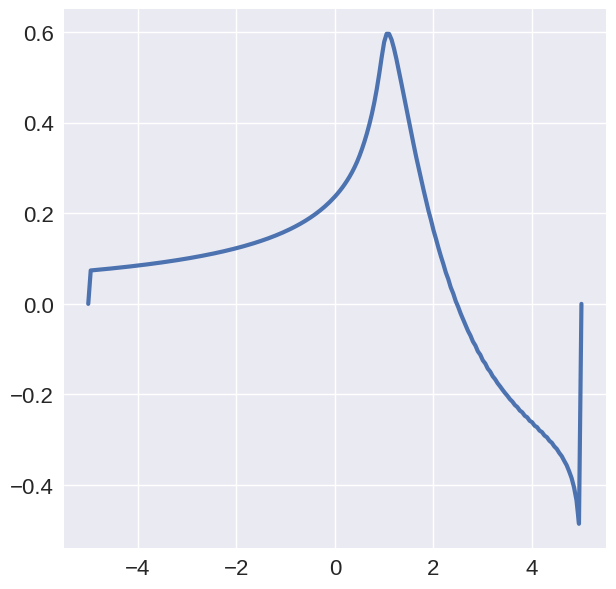

In [34]:
# plt.plot(erange, xs0_hi)
plt.plot(erange, xs0_hi_adaptive)

In [32]:
%%timeit
xs0_hi = np.array([tm.x_solve(E, 0, 0, ch_HI.T, ch_HI.iVS[0], ch_HI.iOm, ch_HI.iReG2, ch_HI.iImG2, 5, 1) for E in erange])


2.78 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%%timeit
xs0_hi_adaptive = np.array([tm.x_solve(E, 0, 0, ch_HI.T, ch_HI.iVS[0], ch_HI.iOm, ch_HI.iReG2, ch_HI.iImG2, 5, 1, adaptive=1) for E in erange])

48.1 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
tm.sigma_ff_onshell()